# Initialize

In [12]:
# Options

## Debugging level
debug_level = 0


In [13]:
# Initialize framework
constants, tools = init_processing(debug_level)
%matplotlib inline


In [14]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [15]:
atlas.head()

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,
Louisiana Board Of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
State University Of Ny Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
St. Mary'S College Of Maryland,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days


In [16]:
(atlas["Invoice Date"] - atlas["Service Start"]).apply(lambda date: date.days)

Customers
Louisiana Board Of Regents              2.0
Emporia State University               -4.0
Morehead State University              13.0
State University Of Ny Potsdam         25.0
St. Mary'S College Of Maryland          2.0
                                       ... 
University Of California, Riverside   -57.0
Ctu Foundation, Inc                     2.0
Felician University                     2.0
Nea Vermont                             2.0
University Of Nc Greensboro             2.0
Length: 669, dtype: float64

<AxesSubplot:xlabel='Customers'>

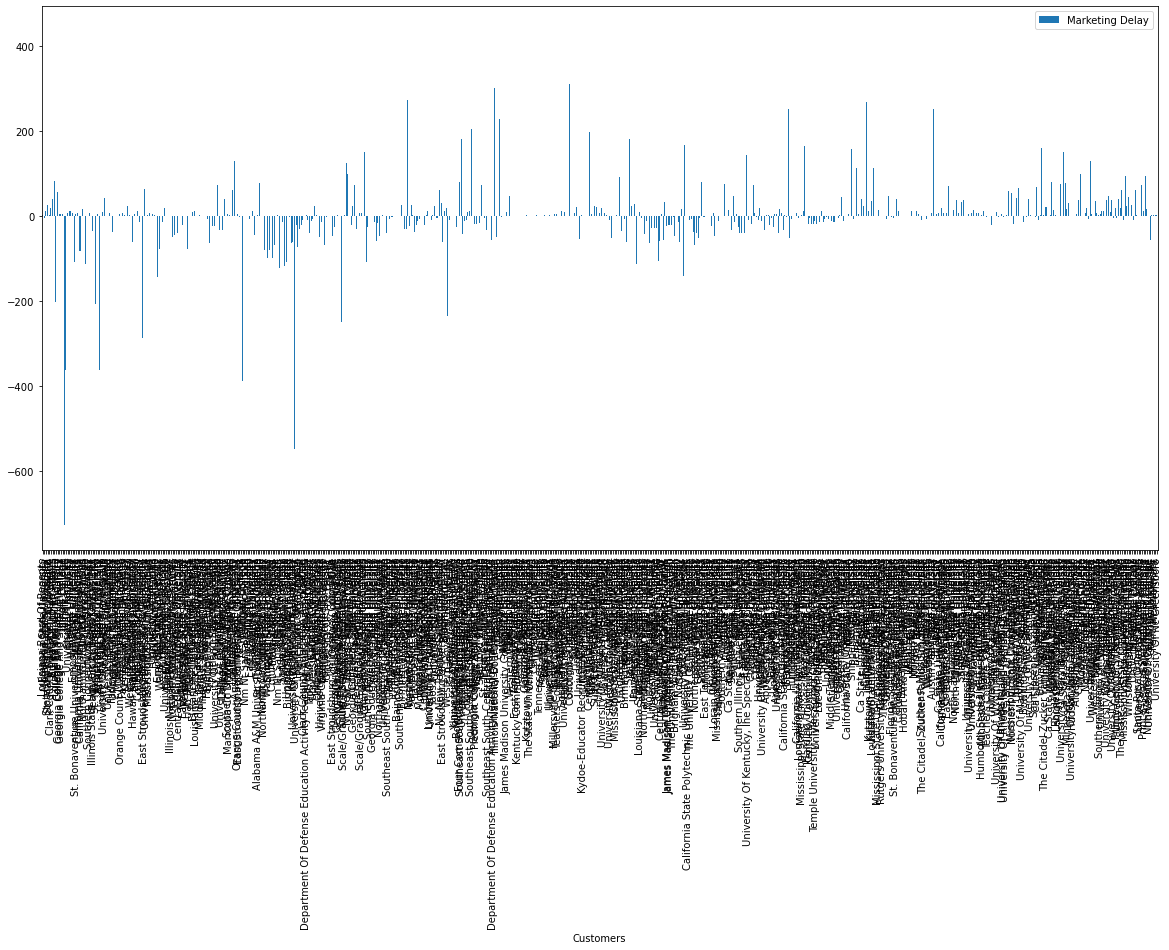

In [17]:
# Plot delays between marketing initiation and payment date (NOTE: This is sample data and not accurate until relevant data is available.)
marketing_delay = atlas["Invoice Date"] - atlas["Service Start"]
marketing_delay_days = marketing_delay.apply(lambda date: date.days)
marketing_delay_df = pd.DataFrame(marketing_delay_days, columns=["Marketing Delay"])
marketing_delay_df.plot.bar(figsize=(20, 10))

# TODO Group by customer regardless and Group by subscription length.
# TODO Response time for each state
# TODO Response time for each type of customer ("ATLAS Customer Type")
# TODO Response time for each type of customer ("Organization Record Type")
# TODO Data on potential customers and %success


In [18]:
marketing_delay_df.plot.barh(figsize=(20, 30))

<AxesSubplot:ylabel='Customers'>

Error in callback <function flush_figures at 0x000001F6874AD040> (for post_execute):


KeyboardInterrupt: 

In [8]:
# Basic info
total_invoiced_per_customer = atlas.groupby(["Customers"]).sum()
total_invoiced_per_customer.head()

,Number of Users,Invoice Amount,Lat,Long
Customers,,,,
Alabama A&M University-College Of Education,0.0,5460.0,34.785061,-86.573280
Albertus Magnus College,0.0,5670.0,41.331299,-72.921440
Albuquerque Public Schools,0.0,2270.0,35.092410,-106.642950
Alcorn State University,0.0,1700.0,31.875710,-91.141739
Alderson Broaddus University,50.0,500.0,39.160261,-80.049048


In [9]:
atlas.head(1)

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,
Louisiana Board Of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.46019,-91.18853,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days


In [46]:
# Upgrade sequence
def fcn(df):
    # print(f"Size of df: {df.shape}")
    # dfs = df["Subscription"]
    # print(f"Contents of of df[Subscription]: {dfs}")
    # print(f"Contents of of df: {df}")

    customer_subscriptions_ordered_by_date = df.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")
    # subscriptions = df#.reset_index().loc[["Subscription", "Service Start"]]
    # subscriptions = df["Subscription"].values
    subscription_upgrade_sequence = customer_subscriptions_ordered_by_date["Subscription"].to_list()

    # print(customer_subscriptions_ordered_by_date)

    # TODO fcn to compute upgrade, downgrade, and delays between them.

    return subscription_upgrade_sequence


# Calculate conversion rates across various subscription combinations
repeat_customers = atlas.index.duplicated()
print(f"There are {repeat_customers.sum()} universities in this dataset who purchased 2 or more subscriptions.")
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])

service_upgrades = pd.DataFrame( atlas.loc[repeat_customers].sort_values("Service Start").groupby("Customers").apply(fcn) )
service_upgrades.columns = [ "UpgradeSequence" ]
service_upgrades



# TODO Reduce #groups by also grouping by location, type of customer etc.

# TODO Add a category and grouping everywhere based on total or trailing invoice value (0-100k, 100k-1M, etc)

# TODO: Tag the following:
# - Drop-off in subscription length
# - Drop-off in subscription coverage
# - Upgrades with coverage gaps
# - Upgrades with no coverage gaps
# - Any coverage gaps

# TODO Find late payers past threshold

There are 269 universities in this dataset who purchased 2 or more subscriptions.


,UpgradeSequence
Customers,
American University,[1 Year]
Appalachian State University,[1 Year]
Armstrong State University,"[3 Years, 3 Years]"
Auburn University,[1 Year]
Augusta University,"[1 Year, 1 Year, 1 Year, 3 Months, 1 Year, 1 Y..."
...,...
Walla Walla Public Schools,[3 Years]
Western Governors University,"[1 Year, 2 Years, 1 Year]"
Western Illinois University,[1 Year]


In [74]:
# New customers
historical = atlas.reset_index().set_index("Service Start").sort_index().reset_index()
duplicated_customers = historical.reset_index()["Customers"].duplicated().apply(lambda x: not x)

new_customers = historical.loc[duplicated_customers].set_index("Service Start")
new_customers

# new_customers.hvplot.line(width=1000, height=400)


,Customers,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service End,Subscription Duration
Service Start,,,,,,,,,,,,
2015-03-18 00:00:00-04:00,Louisiana Board Of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2016-06-30 00:00:00-04:00,365 days
2015-06-01 00:00:00-04:00,Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2016-06-30 00:00:00-04:00,365 days
2015-06-01 00:00:00-04:00,State University Of Ny Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2016-06-30 00:00:00-04:00,365 days
2015-06-10 00:00:00-04:00,Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2016-06-30 00:00:00-04:00,365 days
2015-09-18 00:00:00-04:00,Bureau Of Indian Affairs,NaN,2015-10-27 00:00:00-04:00,AJ506,28000.0,1 Year,4700-4-11-00100-00-1502,"1849 C Street, N.W Washington, D.C. 20240",38.894453,-77.042603,2016-12-31 00:00:00-05:00,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 00:00:00-05:00,University Of Texas At San Antonio,100.0,2020-11-02 00:00:00-05:00,NB110220B,2500.0,1 Year,4700-0-00-00000-00-0000,NaN,NaN,NaN,2021-10-31 00:00:00-04:00,365 days
2020-11-02 00:00:00-05:00,Tacoma Public Schools,85.0,2020-06-16 00:00:00-04:00,NB061620A,5500.0,3 Years,4700-0-00-00000-00-0000,NaN,NaN,NaN,2023-11-30 00:00:00-05:00,1095 days
2020-11-03 00:00:00-05:00,Nhti-Concord’S Community College,50.0,2020-11-04 00:00:00-05:00,NB110420B,2000.0,1 Year,4700-0-00-00000-00-0000,NaN,NaN,NaN,2021-10-31 00:00:00-04:00,365 days


In [11]:
# atlas.columns
atlas.loc[:, ["Subscription", "Service Start"]]
atlas.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")

,Subscription,Service Start
Customers,,
Louisiana Board Of Regents,1 Year,2015-03-18 00:00:00-04:00
Emporia State University,1 Year,2015-06-01 00:00:00-04:00
State University Of Ny Potsdam,1 Year,2015-06-01 00:00:00-04:00
Morehead State University,1 Year,2015-06-10 00:00:00-04:00
Bureau Of Indian Affairs,1 Year,2015-09-18 00:00:00-04:00
...,...,...
University Of St. Thomas,1 Year,2020-11-07 00:00:00-05:00
"University Of California, Riverside",1 Year,2020-12-31 00:00:00-05:00
Central Connecticut State University,3 Years,NaT
